# **Logistic Regression**
<hr>
Logistic Regression is used when the dependent variable is categorical. For example, To predict whether an email is spam (1) or (0) Whether the tumor is malignant (1) or not (0).

- **Advantages:**
    1. It's easier to implement, interpret, and very efficient to train
    2. It makes no assumptions about distributions of classes in feature space
    3. It can easily extend to multiple classes and a natural probabilistic view of class predictions
    4. The predicted parameters (trained weights) give inference about the importance of each feature. The direction of association i.e. positive or negative is also given. So we can use logistic regression to find out the relationship between the features
    5. It's very fast at classifying unknown records
    6. Good accuracy for many simple data sets and it performs well when the dataset is linearly separable
    7. It can interpret model coefficients as indicators of feature importance.
    8. Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets. ne may consider Regularization (L1 and L2) techniques to avoid over-fittingin these scenarios

- **Disadvantages:**
    1. If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting
    2. It constructs linear boundaries
    3. The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. Only important and relevant features should be used
    4. It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set
    5. Non-linear problems can’t be solved with logistic regression because it has a linear decision surface. Linearly separable data is rarely found in real-world scenarios
    6. Logistic Regression requires average or no multicollinearity between independent variables
    7. It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm
    8. In Linear Regression independent and dependent variables are related linearly. But Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p))

Logistic Regression is similar to linear regression, except logistic regression predicts whether something is true or false, instead of predicting something continuous like size.

![](https://i.imgur.com/J0WUMZf.png)

Instead of fitting or model, a line to the data, logistic regression fits an "S" shaped "logistic function" based on the curve with maximum likelihood, called Sigmoid function who aims to add non-linearity in a ML Model. The curve goes from 0 to 1, and that means that the curve tells you the probability that a mouse is obese based on its weight. 

**Sigmoid Function**

$$
f(x) = \frac{1}{1 + e^{-z}}
$$

If we weighed a very heavy mouse, there is a high probability that the new mouse is obese, or if weighed a light mouse there is a small probability that this new mouse is obese. Although logistic regression tells the probability that a mouse is obese or not, it's usually used for classification. For example, if the probability of a mouse if obese is > 50%. then we'll classify it as obese, otherwise, we'll classify it as "not obese".

![](https://i.imgur.com/iSI7hrR.png)

Just like linear regression, we can make simple models where obesity is predicted by weight, otherwise, a more complicated model, where obesity is predicted by weight + genotype or by weight + genotype + age. However, unlike normal regression, we can't easily compare the complicated model to the simple model.

Logistic regression's ability to provide probabilities and classify new samples using continuous and discrete measurements makes it a popular machine learning method.

## **Importing the libraries**
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Importing the dataset**
<hr>

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## **Splitting the dataset into the Training set and Test set**
<hr>

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
print(X_train.shape)
print(y_train.shape)

(300, 2)
(300,)


In [8]:
print(X_test.shape)
print(y_test.shape)

(100, 2)
(100,)


## **Feature Scaling**
<hr>
Why do we have to apply? In this case, it will improve the training performance and therefore it'll also improve the final predictions.

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[:10])
print(X_test[:10])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]]


## **Training the Logistic Regression model on the Training set**
<hr>

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## **Predicting a new result**
<hr>

In [11]:
classifier.predict(sc.transform([[30, 87000]]))

array([0])

## **Predicting the Test set results**
<hr>

In [12]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## **Making the Confusion Matrix and Accuracy**
<hr>

![](https://miro.medium.com/max/1000/1*fxiTNIgOyvAombPJx5KGeA.png)

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


- 65 Correct predictions of the customers who didn't buy the SUV
- 8 Incorrect predictions of the customers who didn't buy the SUV
- 24 Correct predictions of the customers who bought the SUV
- 3 Incorrect predictions of the customers who bought the SUV

In [14]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc*100,"%")

Accuracy: 89.0 %


## **Visualising the Training set results**
<hr>

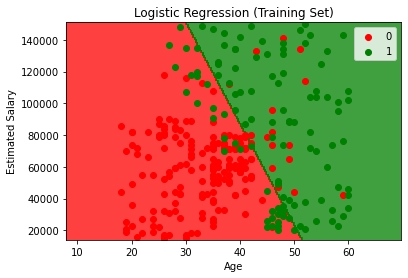

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min()-10, X_set[:, 0].max()+10, 0.25),
                     np.arange(X_set[:, 1].min()-1000, X_set[:, 1].max()+1000, 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(("red", "green")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(("red", "green"))(i), label = j)
    
plt.title("Logistic Regression (Training Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

## **Visualising the Test set results**
<hr>

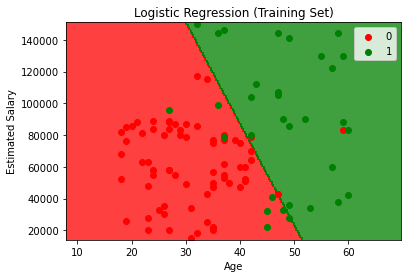

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min()-10, X_set[:, 0].max()+10, 0.25),
                     np.arange(X_set[:, 1].min()-1000, X_set[:, 1].max()+1000, 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(("red", "green")))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(("red", "green"))(i), label = j)
    
plt.title("Logistic Regression (Training Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()